# **MACHINE LEARNING**


**1.** Apresentação de um problema real que pode ser resolvido com
modelo supervisionado (2~3 slides contendo o tipo de problema e a
técnica/modelo que resolveria);

    Resposta : A possibilidade de evasão de um aluno de um curso de graduação. 
    Modelo   : Classificação (Regressão  Logística).

**2.** Apresentação de um problema real que pode ser resolvido com
modelo não-supervisionado (2~3 slides contendo o tipo de problema
e a técnica/modelo que resolveria);

    Resposta : Segmentação de carreira de alunos com base em performance em cada área de atuação escolar. 
    Modelo   : Clustering (K-Means).

**3.** Apresentação de um problema real que pode ser resolvido usando ML,
mas não precisa de fato;

    Resposta : Detectar possível hacker em uma rede interna com base no seu comportamento. O mesmo pode ser verificado com base em IPs ou portas acessadas pelo usuário, colocando as condições de identificação ou bloqueio via Firewall.
    Modelo   : Classificação (Regressão  Logística) ou Deep Learning.

**4.** Apresentar um problema implementado (com código), que pode ser:

    a. Um artigo científico que usou algum modelo visto na disciplina
    para resolver um determinado problema. 
    b. Um problema de alguma competição (e.g. Kaggle) que usou
    algum modelo visto na disciplina.
    c. Escolher qualquer problema que o grupo queira (da empresa
    que trabalha, StartupOne) e criar uma aplicação de ML. 

## Modelo de Previsão de Partidas da Copa do Mundo

O objetivo do modelo é prever o resultado de jogos da Copa do Mundo de futebol de 2022 no Quatar.
O intuito do projeto é utilizar os modelos supervisionados de classificação para obter o resultado esperado de cada partida da competição, chegando no possível ganhador.

In [356]:
# Carregamos as principais bibliotecas necessárias
import pandas as pd
import numpy as np

In [357]:
# Realizamos a leitura do dataset
dados = pd.read_csv("results.csv")

In [358]:
# Fazemos a descrição dos dados:
dados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [359]:
# verificamos os tipos de dados
# verificamos se temos dados vazios que precisam ser tratados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


In [360]:
# Removemos os NAs presentes
dados = dados.dropna();

# Covertemos os placares para inteiros
dados["home_score"] = dados["home_score"].astype("int")
dados["away_score"] = dados["away_score"].astype("int")

dados[["home_score","away_score"]]

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0
...,...,...
44054,1,1
44055,0,2
44056,1,1
44057,5,1


In [361]:
# Separamos os valores de data em colunas diferentes
dados[["year", "month", "day"]] = dados["date"].str.split("-", expand = True)

# Convertemos as strings para inteiros
dados[["year", "month", "day"]] = dados[["year", "month", "day"]].astype("int")
dados[["year", "month", "day"]]

dados.drop("date", axis=1)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,6
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4
...,...,...,...,...,...,...,...,...,...,...,...
44054,Albania,Iceland,1,1,UEFA Nations League,Tirana,Albania,False,2022,9,27
44055,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,2022,9,27
44056,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,2022,9,27
44057,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,2022,9,27


In [362]:
# Mudamos os valores de cada coluna categorica para o tipo category, para futuramente transformá-los em números
dados["home_team"]  = dados["home_team"].astype('category')
dados["away_team"]  = dados["away_team"].astype('category')
dados["tournament"] = dados["tournament"].astype('category')
dados["city"]       = dados["city"].astype('category')
dados["country"]    = dados["country"].astype('category')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44059 entries, 0 to 44058
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        44059 non-null  object  
 1   home_team   44059 non-null  category
 2   away_team   44059 non-null  category
 3   home_score  44059 non-null  int32   
 4   away_score  44059 non-null  int32   
 5   tournament  44059 non-null  category
 6   city        44059 non-null  category
 7   country     44059 non-null  category
 8   neutral     44059 non-null  bool    
 9   year        44059 non-null  int32   
 10  month       44059 non-null  int32   
 11  day         44059 non-null  int32   
dtypes: bool(1), category(5), int32(5), object(1)
memory usage: 2.1+ MB


In [363]:
# Convertemos as colunas categoricas para inteiros
dados["home_team"] = dados["home_team"].cat.codes
dados["away_team"] = dados["away_team"].cat.codes
dados["tournament"] = dados["tournament"].cat.codes
dados["city"] = dados["city"].cat.codes
dados["country"] = dados["country"].cat.codes
dados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,238,83,0,0,70,642,204,False,1872,11,30
1,1873-03-08,83,233,4,2,70,1003,68,False,1873,3,8
2,1874-03-07,238,83,2,1,70,642,204,False,1874,3,7
3,1875-03-06,83,233,2,2,70,1003,68,False,1875,3,6
4,1876-03-04,238,83,3,0,70,642,204,False,1876,3,4


In [364]:
# Criamos uma coluna para mencionar o vencedor da partida

def classificar_vencedor(x):     
    if x["home_score"] == x["away_score"]:
        x["winner_home"] = 2
    else:
        if x["home_score"] > x["away_score"]:
            x["winner_home"] = 1
        else:
            x["winner_home"] = 0
    return x

dados = dados.query("year >= 2000")
dados = dados.apply(lambda x: classificar_vencedor(x),axis=1)
print(dados)

# Verificar os tipos de valores na neutral
dados["neutral"].unique()

# Transformar em inteiro

dados["neutral"] = dados["neutral"].astype(int)

# Remover coluna de data

dados.drop(["date"], axis=1,inplace=True)

# Normalizar os dados 
from sklearn import preprocessing

dados["home_team"] = dados["home_team"] / dados["home_team"].max()  
dados["away_team"] = dados["away_team"] / dados["away_team"].max()  
dados["home_score"] = dados["home_score"] / dados["home_score"].max()  
dados["away_score"] = dados["away_score"] / dados["away_score"].max()  
dados["tournament"] = dados["tournament"] / dados["tournament"].max()  
dados["city"] = dados["city"] / dados["city"].max()  
dados["country"] = dados["country"] / dados["country"].max()  
dados["year"] = dados["year"] / dados["year"].max()  
dados["month"] = dados["month"] / dados["month"].max()  
dados["day"] = dados["day"] / dados["day"].max()  


dados.head()



             date  home_team  away_team  home_score  away_score  tournament  \
22776  2000-01-04         80        269           2           1          70   
22777  2000-01-07        277        269           7           0          70   
22778  2000-01-08        276         47           0           0          70   
22779  2000-01-09         43         97           1           1          70   
22780  2000-01-09        112         13           1           1          70   
...           ...        ...        ...         ...         ...         ...   
44054  2022-09-27          2        122           1           1         127   
44055  2022-09-27        197        235           0           2         127   
44056  2022-09-27        260        242           1           1         127   
44057  2022-09-27        143         70           5           1         127   
44058  2022-09-27        107        192           3           1         127   

       city  country  neutral  year  month  day  wi

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,winner_home
22776,0.258065,0.881967,0.064516,0.047619,0.507246,0.054446,0.249057,0,0.98912,0.083333,0.129032,0
22777,0.893548,0.881967,0.225806,0.000000,0.507246,0.904096,0.898113,0,0.98912,0.083333,0.225806,0
22778,0.890323,0.154098,0.000000,0.000000,0.507246,0.696803,0.894340,0,0.98912,0.083333,0.258065,1
22779,0.138710,0.318033,0.032258,0.047619,0.507246,0.649351,0.128302,0,0.98912,0.083333,0.290323,1
22780,0.361290,0.042623,0.032258,0.047619,0.507246,0.503497,0.928302,1,0.98912,0.083333,0.290323,1


C:\Users\gabri\AppData\Local\Temp\ipykernel_154784\3930402202.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.figure(figsize=(20,20),dpi=300).show()


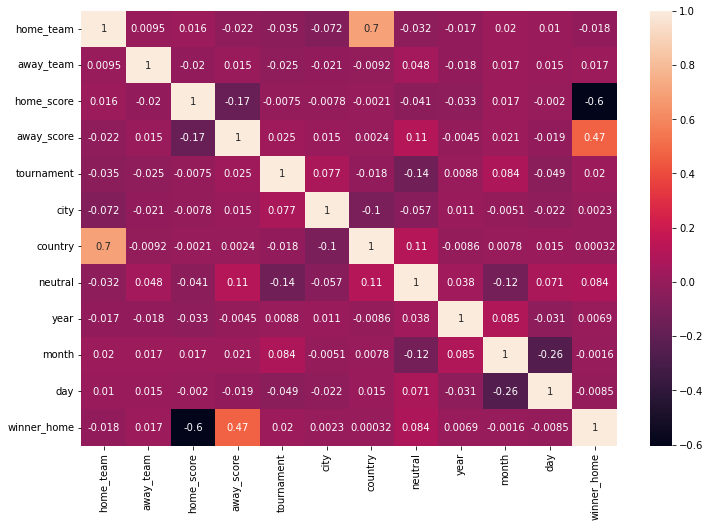

<Figure size 6000x6000 with 0 Axes>

In [365]:
# Verificar correlação 

import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


corr_matrix = dados.corr()
sn.heatmap(corr_matrix, annot=True)
figure_size = plt.gcf().get_size_inches()
factor = 2
plt.gcf().set_size_inches(factor * figure_size)
plt.figure(figsize=(20,20),dpi=300).show()


In [366]:
# remover váriaveis com corelações fracas demais 

#dados.drop(["day"], axis=1,inplace=True)
#dados.drop(["year"], axis=1,inplace=True)
#dados.drop(["country"], axis=1,inplace=True)


# Verificar se está tudo correto
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21283 entries, 22776 to 44058
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   home_team    21283 non-null  float64
 1   away_team    21283 non-null  float64
 2   home_score   21283 non-null  float64
 3   away_score   21283 non-null  float64
 4   tournament   21283 non-null  float64
 5   city         21283 non-null  float64
 6   country      21283 non-null  float64
 7   neutral      21283 non-null  int32  
 8   year         21283 non-null  float64
 9   month        21283 non-null  float64
 10  day          21283 non-null  float64
 11  winner_home  21283 non-null  int64  
dtypes: float64(10), int32(1), int64(1)
memory usage: 2.0 MB


In [367]:
# Vamos separar a base em duas partes, uma de treino e outra de teste
from sklearn.model_selection import train_test_split

X = dados.drop(["home_score","away_score","winner_home"], axis=1)
y = dados[["winner_home"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y

,winner_home
22776,0
22777,0
22778,1
22779,1
22780,1
...,...
44054,1
44055,1
44056,1
44057,0


In [368]:

# Criar o modelo de regresão 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(multi_class='multinomial',penalty='none')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Accuracy Score:', acc_log)


Accuracy Score: 53.52


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
